# LECTURE 17:
Supernovae distances and redshifts

## IMPORT MODULES

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit

from astroML.datasets import generate_mu_z

In [5]:
from astroML.linear_model import PolynomialRegression

AttributeError: partially initialized module 'theano' has no attribute 'compile' (most likely due to a circular import)

# 1 - FIT

In [6]:
z_sample, mu_sample, dmu = generate_mu_z(100, random_state=1234)

## LINEAR REGRESSION

In [7]:
z_sample = z_sample[:, np.newaxis]

NameError: name 'PolynomialRegression' is not defined

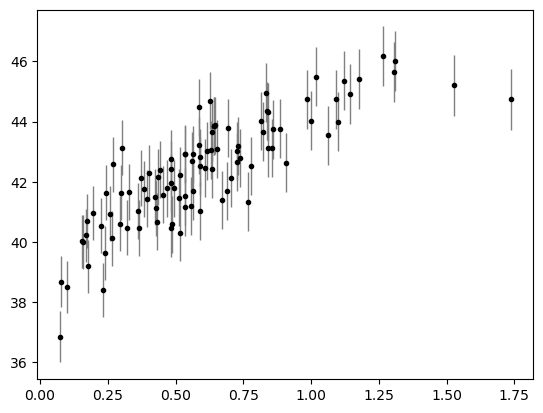

In [8]:
degree = 5

scaler = StandardScaler()
#z_scaled = scaler.fit_transform(z_sample)

plt.errorbar(z_sample, mu_sample, dmu, fmt='.k', ecolor='gray', lw=1,label='data')
z_pred = np.linspace(z_sample.min(), z_sample.max())[:, None]

for d in range(degree):
    model = PolynomialRegression(d+1)
    model.fit(z_sample, mu_sample, dmu)
    mu_pred = model.predict(z_pred)

    plt.plot(z_pred, mu_pred, label=d+1)

plt.legend()

# 2 - CROSS VALIDATION

In [ ]:

common_params = {
    "X": z_sample,
    "y": mu_sample,
    "train_sizes": np.linspace(0.1, 1.0, 5),
    "cv": ShuffleSplit(n_splits=10, test_size=0.2, random_state=0),
}

In [ ]:
# see learning_curve/ShuffleSplit documentation

model = PolynomialRegression(2)
train_size, train_score, test_score = learning_curve(model, **common_params)

plt.plot(train_size, -test_score.mean(axis=1), 'o-', color="r", label="Val")
plt.plot(train_size, -train_score.mean(axis=1), 'o-', color="g", label="Train")

plt.legend()